**Project Title: Credit Card Customer Churn Detection Using Machine Learning**


Team: DataMosaic



Nasir Uddin Ahmed S2015449

Rabita Bhuiya Tanaya 22111473

Abu Bashir Fatani 17159040

San Yongli 23083759

Qifang Zou S2195887


1. **Problem Statement**: The banking industry has a persistent problem with customer churn, especially with credit cards. As there are so many variables that can affect a customer's decision to leave, such as superior offerings from competitors, changes in the customer's financial situation, and more,predicting churn can be a challenging task. Many banks still have difficulty accurately predicting and mitigating customer attrition, even in the face of the development of sophisticated data analytics tools. The goal of this project is to create a model that can predict customer churn with enough accuracy to help banks keep their valuable credit card customers. Based
on this problem, the model will be developed.





2. **Project Objectives**:

i. To identify the underlying factors influencing credit card customer churn.

ii. To construct a predictive model capable of forecasting credit card customer churn.

iii. To evaluate the performance of the predictive model in accurately predicting credit card customer churn.

iv. To formulate actionable recommendations aimed at reducing customer churn in the credit card segment.


3. **Data Mining Goals**:

i. Develop a Predictive Model: Aim to build a model that predicts credit card customer churn by analyzing factors such as customer service quality, competitive offers, and financial changes.

ii. Formulate Retention Strategies: Utilize insights from the predictive model to create targeted strategies to reduce churn, focusing on retaining customers at high risk of leaving.

4. **Data Understanding**: This dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 23 features.

Dataset Link: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?resource=download



**Dataset Loading**

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/Turjo7/WQD-7003-Credit-Card-Customer-Churn-Detection-Using-Machine-Learning/main/BankChurners.csv"
df = pd.read_csv(url)
print(df.head())

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

# Data Cleaning

Before perform any cleaning task, lets remove unnecessary last 2 columns since its name is quite lengthy and we wont use for the rest of the project

In [ ]:
df = df.iloc[:, :-2]

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Now we can see some heads up from our dataset that we going to use for the rest of the project. It contains 23 column after we remove the unnecessary column. Now lets check our data frame column type to ensure its under the right type.

In [ ]:
print(df.dtypes)

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


First column, CLIENTNUM refer to unique identity of the consumer. currently its under Integer type and to avoid confusion during analysis later part, lets change the type to Object

In [ ]:
# Convert column 'CLIENTNUM' from int to char
df['CLIENTNUM'] = df['CLIENTNUM'].astype(str)
print(df['CLIENTNUM'].dtypes)

object


After we successfully change above column, let create a script which will run through each column with type of 'int64' or 'float64' in case there is non numerical value inside those.

In [ ]:

def check_numerical_columns(df):
    # Filter out only numerical data types columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    non_numerical_values = {}

    # Check each numerical column for non-numerical values
    for column in numerical_columns:
        # Attempt to convert the column to numeric, coerce errors to NaN
        temp_column = pd.to_numeric(df[column], errors='coerce')
        # Find out how many non-numeric values are there
        non_numeric_count = df[temp_column.isna()].shape[0]
        if non_numeric_count > 0:
            non_numerical_values[column] = non_numeric_count

    return non_numerical_values

check_numerical_columns(df)


{}

From the output above, we can confirm there is no unexpected value in our numerical column. This step is important to ensure our future analysis running seamlessly. Now, lets try to summarize our data frame

In [ ]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Lets check is there any duplication of the customer records in the data frame.

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

No duplicate rows found.


Great, now we know there is no duplication in our data frame. Now lets create year_on_book which derived from Months_on_Book Column

In [ ]:
df['Years_on_book'] = df['Months_on_book'] // 12

# Display the first few rows to verify the new column
print(df[['Months_on_book', 'Years_on_book']].head())

   Months_on_book  Years_on_book
0              39              3
1              44              3
2              36              3
3              34              2
4              21              1


In [ ]:
#let see head of our cleaned data

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Years_on_book
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,3
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,3
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,3
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,2
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


#Exploratory Data Analysis (EDA)
Data analysis begins with exploratory data analysis (EDA), which is learning about the data in order to draw conclusions and spot trends. Data visualisation, analysis of correlations, handling of missing numbers, outlier detection, and inspection of data are all part of it. By illuminating the data's structure, EDA guides subsequent analysis and modeling choices.

In [ ]:
# Calculate summary statistics
summary_stats = df.describe()

# Print summary statistics
print(summary_stats)


       Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    

# UNIVARIATE ANALYSIS:
The statistical technique known as univariate analysis is utilized for the purpose of analyzing data sets that contain only a single variable. In the process of data analysis, it is frequently the initial stage, and its purpose is to provide a description of the fundamental aspects of the data.


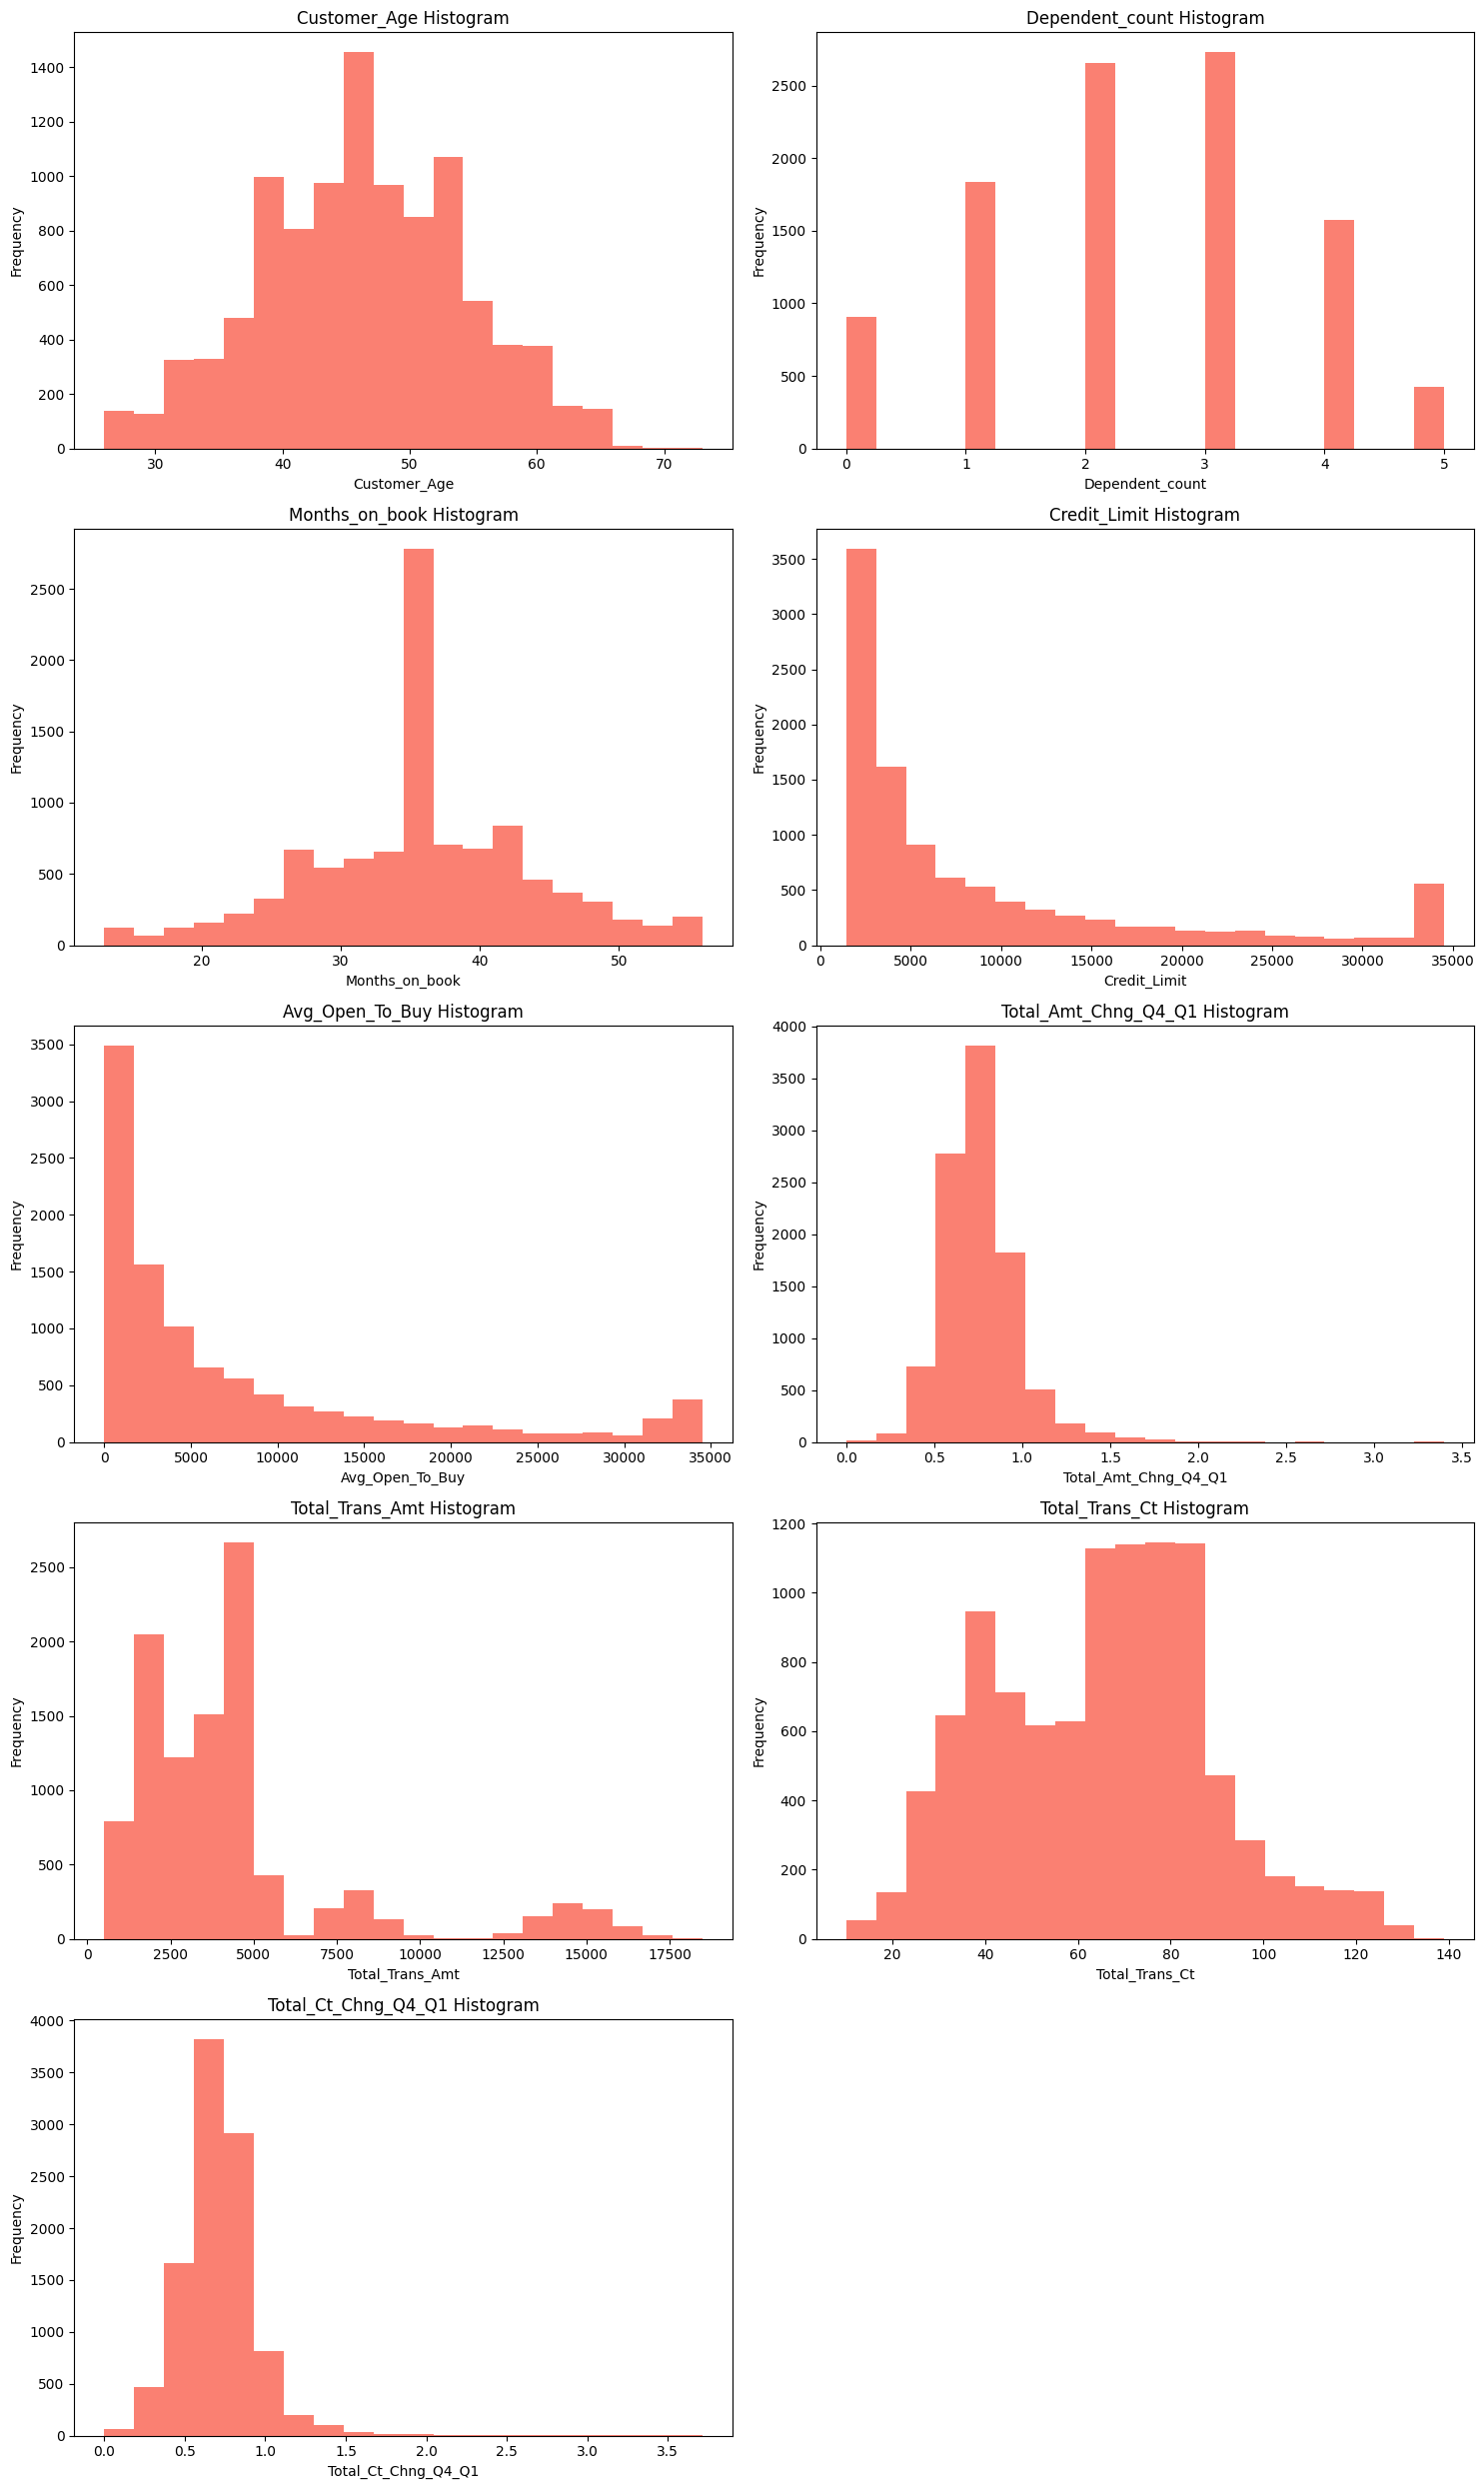

In [ ]:
import matplotlib.pyplot as plt

# Set up subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 25))

# Variables to plot
variables = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Credit_Limit',
              'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
             'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']

# Plot histograms for each variable
for i, variable in enumerate(variables):
    row = i // 2
    col = i % 2
    axes[row, col].hist(df[variable], bins=20, color='salmon')
    axes[row, col].set_title(f'{variable} Histogram')
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('Frequency')

# Hide the last subplot if the number of variables is odd
if len(variables) % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

# Customer Age Distribution:
*   Symmetric Distribution which means balanced around a central point.
*   Age range is between 40-55 for most of the customers.
*   No Missing Value


# Dependent Count Distribution:
*   Symmetric Distribution
*   Most of the customers have 2 or 3 dependants.
*   No outlier detected

# Months on the book Distribution:
*   Symmetric skewed Distribution
*   Most of the customers were active from 25 to 45 months.
*   No Missing Value
*   Outlier detected


# Credit Limit Distribution:
*   Right Skewed Distribution
*   Most of the customers have low credit limit

# Average open to buy Distribution:
*   Right Skewed Distribution
*   Most of the customers average open to buy range is 13 to 7000

# Total amount change(Q4-Q1)Distribution:
*   Values for Total transaction amount change for Q4-Q1 is .5 to 1 mostly
*   Outlier detected
*   Missing Values detected


# Total Trans amount Distribution:
*   Total transaction amount approximately from 500 to 6000 for most of the customers.

# Total Transaction Count Distribution:
*   Same as Total transaction amount distribution
*   Missing Values detected

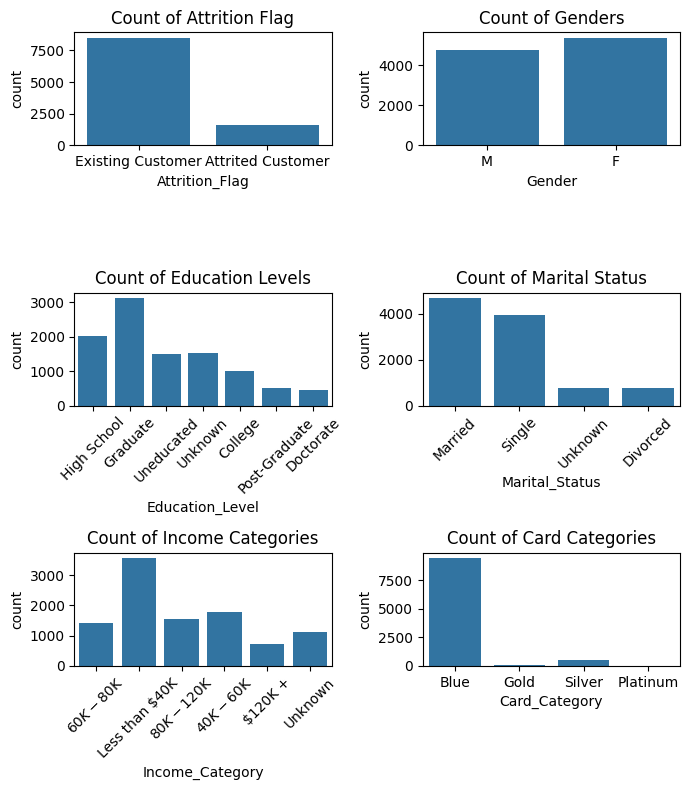

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


fig, axes = plt.subplots(3, 2, figsize=(7, 8))


sns.countplot(x='Attrition_Flag', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Count of Attrition Flag')

sns.countplot(x='Gender', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Count of Genders')


sns.countplot(x='Education_Level', data=df, ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_title('Count of Education Levels')


sns.countplot(x='Marital_Status', data=df, ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_title('Count of Marital Status')

sns.countplot(x='Income_Category', data=df, ax=axes[2, 0])
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].set_title('Count of Income Categories')


sns.countplot(x='Card_Category', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Count of Card Categories')

plt.tight_layout()
plt.show()


## Distribution of Attrition Flag:
A strong overall customer retention rate is indicated by the Count of Attrition Flag, which indicates that the number of current customers is substantially higher than the number of lost customers.

## Distribution of Gender:
The distribution of clients is generally balanced between male (M) and female (F) customers, indicating that there isn't a significant bias towards one gender in the dataset or customer base.

## Distribution of Education Level:
The educational levels are displayed on the graph, ranging from high school to a PhD. At least a college degree is held by the majority of clientele, with "graduate" being the most frequent level.

## Distribution of Marital Status:
The majority of clients are married, then single, divorced, and a little portion is labeled as unknown. Given that marital status frequently influences financial demands and decisions, this may have an impact on product and marketing efforts.

## Distribution of Income Category:
A wide range of customers' income is displayed in the revenue categories bar chart, with noteworthy figures for both less than 40K(USD) and (40K - 60K)USD. Greater income bands, like 120K+ are less typical.

## Distribution of Card Category:
The majority of clients possess a "blue" card, which could be an entrance or standard card; on the other hand, the number of "gold," "silver," and "platinum" card holders is steadily declining. This implies that premium cards are less popular among users even though they might have greater benefits.


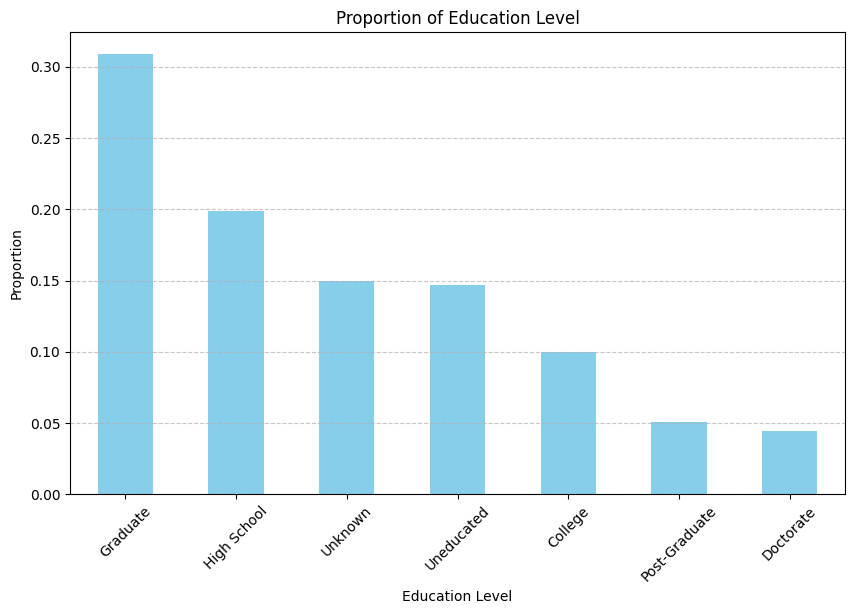

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for Education_Level
education_counts = df['Education_Level'].value_counts()

# Calculate total number of observations
total_observations = len(df)

# Calculate proportion of each category
education_proportions = education_counts / total_observations

# Plot proportions
plt.figure(figsize=(10, 6))
education_proportions.plot(kind='bar', color='skyblue')
plt.title('Proportion of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Proportion of Education Level:
*   Above 30% clients are Graduate, followed by 20% from High School, 10% from college, nearly 10% from post-graduate and Doctorate in this dataset.
*   Approximately 30% Clients are listed as Unknown and Uneductated.


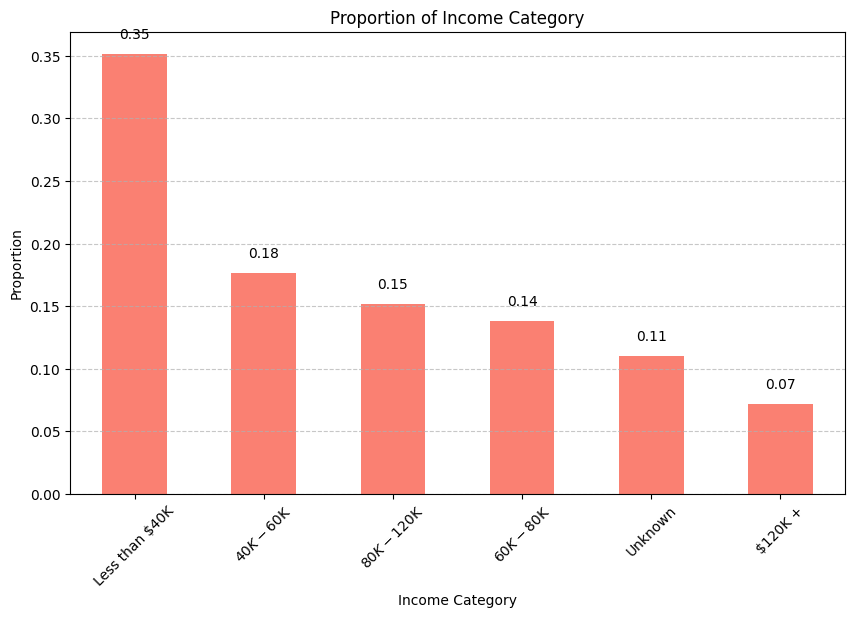

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for Income_Category
income_counts = df['Income_Category'].value_counts()

# Calculate total number of observations
total_observations = len(df)

# Calculate proportion of each category
income_proportions = income_counts / total_observations

# Plot proportions
plt.figure(figsize=(10, 6))
income_proportions.plot(kind='bar', color='salmon')
plt.title('Proportion of Income Category')
plt.xlabel('Income Category')
plt.ylabel('Proportion')

# Annotate each bar with its proportion
for i, proportion in enumerate(income_proportions):
    plt.text(i, proportion + 0.01, f'{proportion:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Proportion of Income Category:
*   We can see 35% Clients have income less that 40k(USD) per year.
*   18% Clients have income from 40k-60k(USD) per year, followed by 15% from 80k-120K(USD) per year and 14% from 60k-80k(USD) per year. We have 11% Clients in our dataset whose income is Unknown.
*   7% Clients have income more than 120K(USD) per year which is very low.

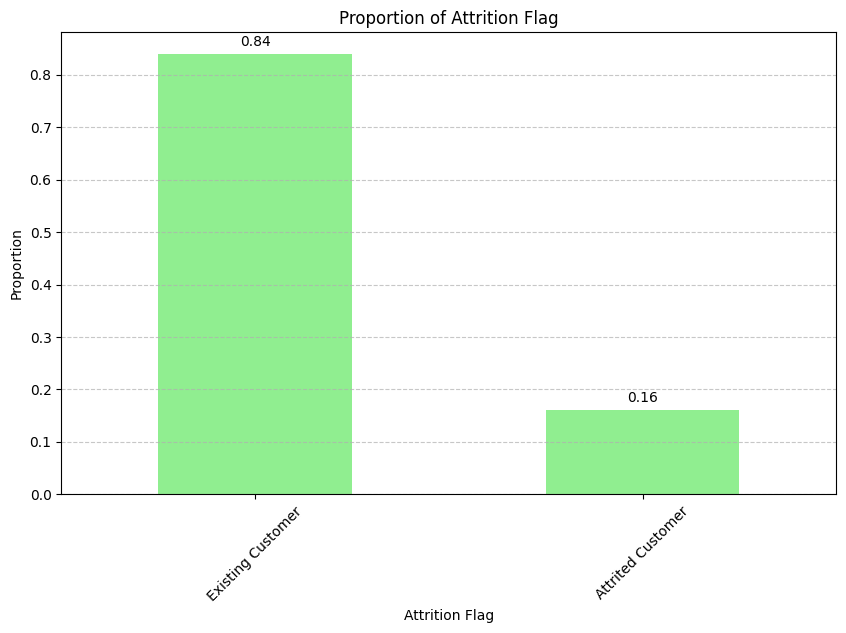

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for Attrition_Flag
attrition_counts = df['Attrition_Flag'].value_counts()

# Calculate total number of observations
total_observations = len(df)

# Calculate proportion of each category
attrition_proportions = attrition_counts / total_observations

# Plot proportions
plt.figure(figsize=(10, 6))
attrition_proportions.plot(kind='bar', color='lightgreen')
plt.title('Proportion of Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Proportion')

# Annotate each bar with its proportion
for i, proportion in enumerate(attrition_proportions):
    plt.text(i, proportion + 0.01, f'{proportion:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Proportion of Existing and Attrited Customer Count :
* The statistical results indicate that 84% of the users in this data are Existing Customers and 16% belong to Attracted Customers

> Add blockquote




# BIVARIATE ANALYSIS:
Bivariate analysis examines the relationship between two variables by utilizing graphing techniques such box plots, scatter plots, and correlation coefficients. Determining the nature, direction, and strength of the relationship between the variables is the goal of this analysis. Insights into trends, patterns, and predictive modeling can be aided by this approach.



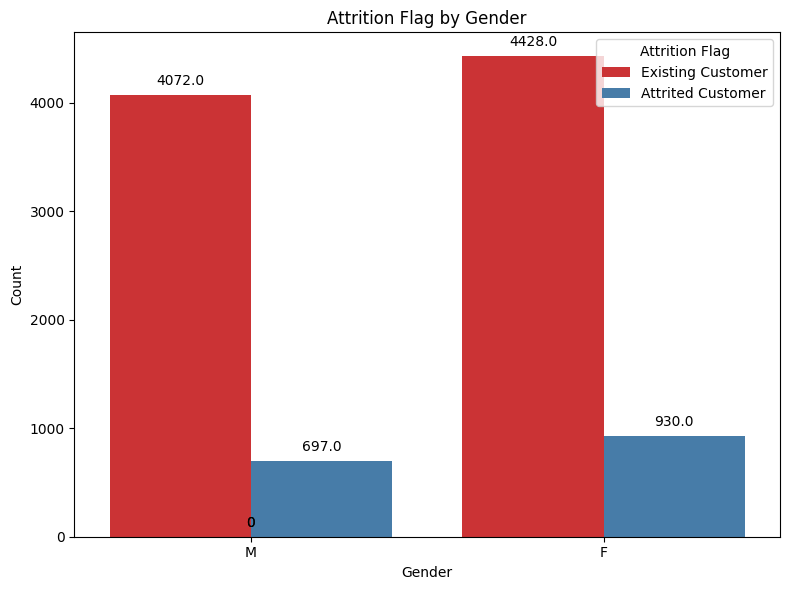

In [ ]:
# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Gender', hue='Attrition_Flag', palette='Set1')

plt.title('Attrition Flag by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition Flag')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


# Attrition Flag by Gender:
* Based on the barplot, we are able to understand that this dataset contains a greater number of female clients (4428) than male clients (4072).
* The female sector accounts for 930 of the total number of clients who defected. Within this dataset, there are 697 male clients that have left the company.
* Therefore, the percentage of customers who have left the company is practically identical for both male and female customers.


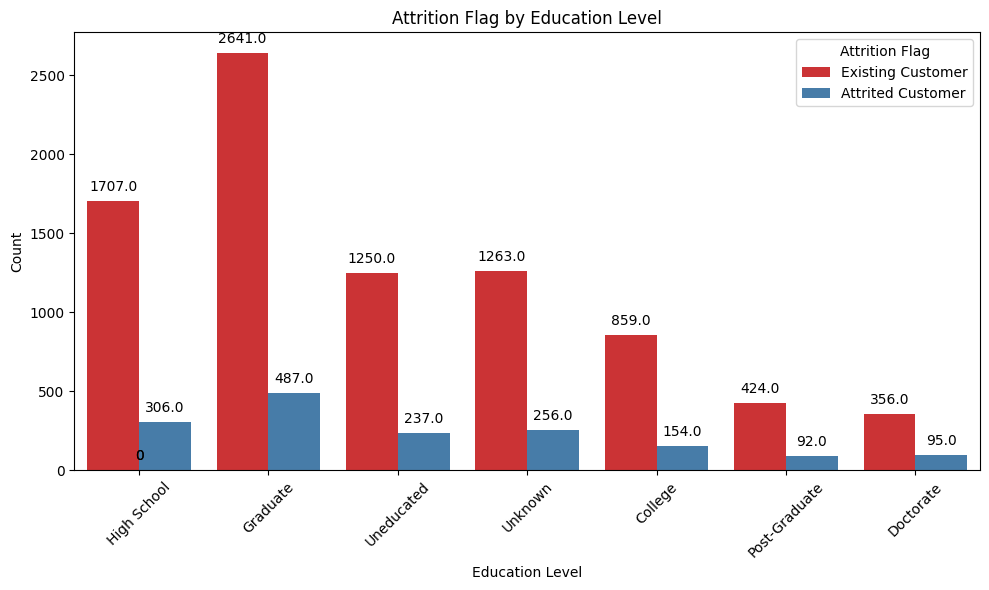

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Education_Level', hue='Attrition_Flag', palette='Set1')

plt.title('Attrition Flag by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Attrition Flag')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()



# Attrition Flag by Education Level:
* Due to the fact that the rate of customer attrition and the rate of retention of existing customers are both behaving in a similar manner, there is no association between the level of education of customers and the rate of customer attrition.

* Clients with a graduate degree make up the majority of the existing clientele, while clients with a doctorate or post-graduate degree make up the smallest number respectively.




<Figure size 1000x600 with 0 Axes>

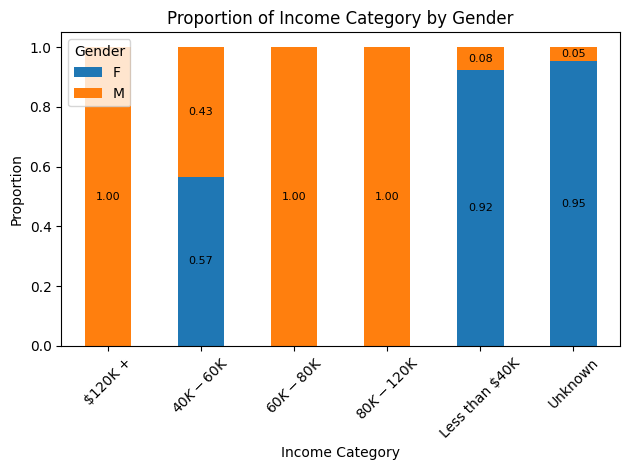

In [ ]:
# Calculate proportions
proportions = df.groupby(['Income_Category', 'Gender']).size().unstack()
proportions = proportions.div(proportions.sum(axis=1), axis=0)

# Plot
plt.figure(figsize=(10, 6))
ax = proportions.plot(kind='bar', stacked=True)

plt.title('Proportion of Income Category by Gender')
plt.xlabel('Income Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Annotate each segment of the bars with its count
for patch in ax.patches:
    total_height = patch.get_height()
    if total_height != 0:
        ax.annotate(f'{total_height:.2f}', (patch.get_x() + patch.get_width() / 2, patch.get_y() + total_height / 2),
                    ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


# Proportion of Income Category by Gender:
* Surprisingly, there has been a substantial shift in the proportion of income that is broken down by gender.

* There are the most females in the lowest income category, which is defined as having an annual income of less than forty thousand dollars (USD), and the ratio of females to males in this income category is 0.92:0.08, with 92% of the population being female.

* All of the clients who fall into the last three income brackets, which are sixty thousand to eighty thousand, eighty thousand to one hundred twenty thousand, and one hundred twenty thousand or more, are male.






<Figure size 1000x600 with 0 Axes>

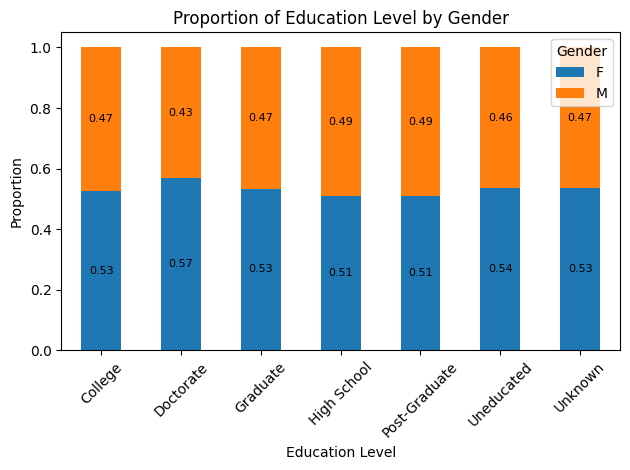

In [ ]:
# Calculate proportions
proportions = df.groupby(['Education_Level', 'Gender']).size().unstack()
proportions = proportions.div(proportions.sum(axis=1), axis=0)

# Plot
plt.figure(figsize=(10, 6))
ax = proportions.plot(kind='bar', stacked=True)

plt.title('Proportion of Education Level by Gender')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Annotate each segment of the bars with its count
for patch in ax.patches:
    total_height = patch.get_height()
    if total_height != 0:
        ax.annotate(f'{total_height:.2f}', (patch.get_x() + patch.get_width() / 2, patch.get_y() + total_height / 2),
                    ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


## Proportion of Education Level by Gender:
* The proportion of males and females in each education level is virtually identical; however, the number of female customers falling into each group is slightly larger than the number of male customers.





<Figure size 1000x600 with 0 Axes>

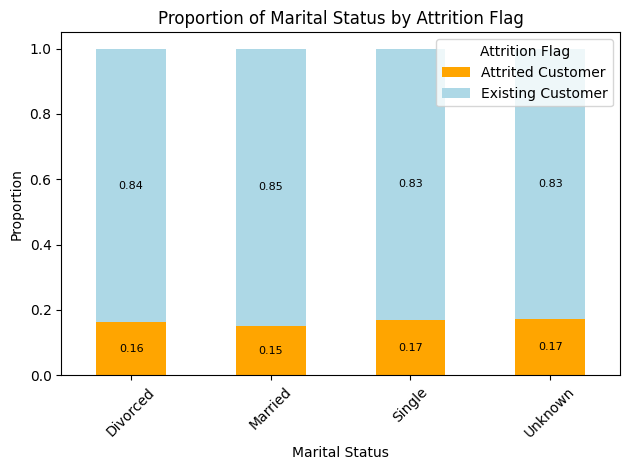

In [ ]:
# Calculate proportions
proportions = df.groupby(['Marital_Status', 'Attrition_Flag']).size().unstack()
proportions = proportions.div(proportions.sum(axis=1), axis=0)

# Plot
plt.figure(figsize=(10, 6))
ax = proportions.plot(kind='bar', stacked=True, color=['orange', 'lightblue'])  # 更改颜色为橙色和蓝色

plt.title('Proportion of Marital Status by Attrition Flag')
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Attrition Flag')

# Annotate each segment of the bars with its count
for patch in ax.patches:
    total_height = patch.get_height()
    if total_height != 0:
        ax.annotate(f'{total_height:.2f}', (patch.get_x() + patch.get_width() / 2, patch.get_y() + total_height / 2),
                    ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


## Proportion of Marital Status by Existing Attrited Customer:
* Overall, the proportion of Existing Customers in Marital_Status ranges from 0.83 to 0.85. Obviously, it is greater than the various proportions of Attributed Customer in Marital_Status.




# MULTIVARIATE ANALYSIS:
Multivariate analysis is the term used to describe statistical techniques used to analyze data sets having several variables. It looks at the relationships and interactions between different variables in order to uncover patterns, trends, and underlying structures in the data. It encompasses a wide range of methods, such as principal component analysis, discriminant analysis, cluster analysis, regression analysis, and more, enabling a deeper understanding of complex data and supporting decision-making in a variety of sectors, including marketing, finance, and the social sciences.



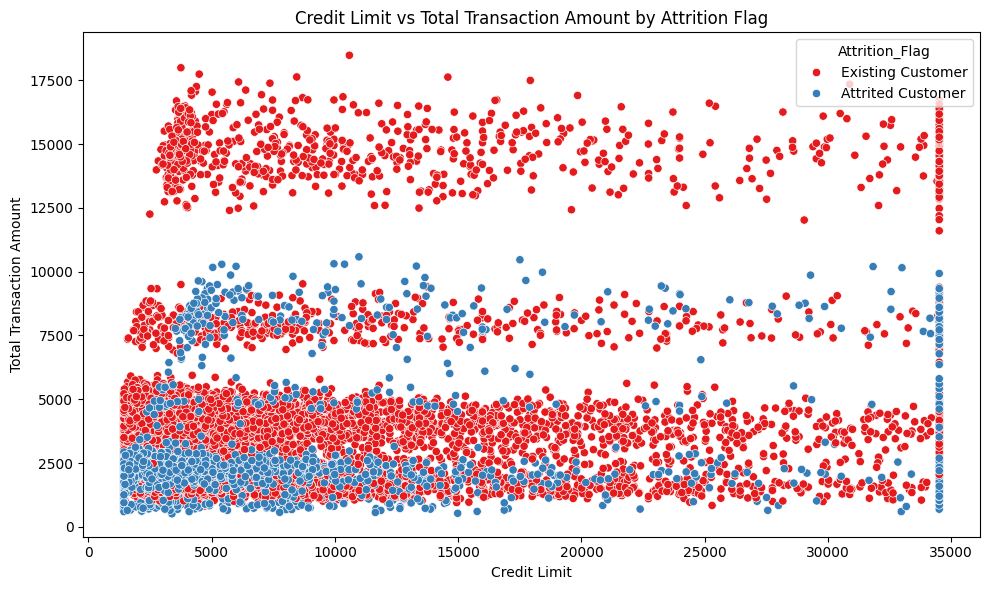

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Credit_Limit', y='Total_Trans_Amt', hue='Attrition_Flag', palette='Set1')
plt.title('Credit Limit vs Total Transaction Amount by Attrition Flag')
plt.xlabel('Credit Limit')
plt.ylabel('Total Transaction Amount')
plt.tight_layout()
plt.show()


# Credit Limit Vs total Transaction Amount by Attrition Flag:
* The Attrition flag is used to tell the difference between the different colors on the chart, which shows the credit limit compared to the total number of transactions.  
* We can observe from the scatter plot that most of the customers who have left are near the lower end of both their credit limit and the total amount of their transactions.




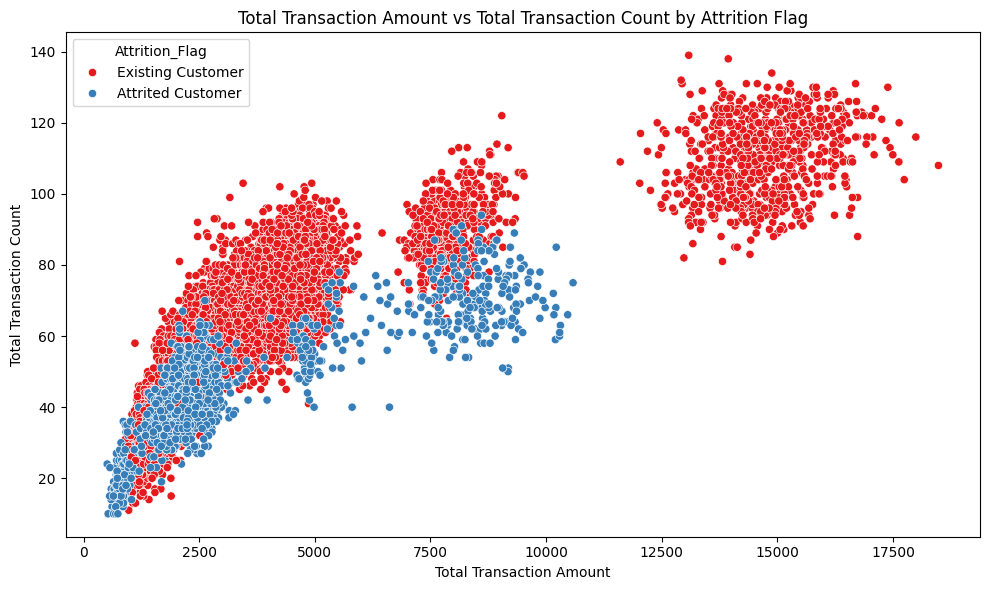

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total_Trans_Amt', y='Total_Trans_Ct', hue='Attrition_Flag', palette='Set1')
plt.title('Total Transaction Amount vs Total Transaction Count by Attrition Flag')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Total Transaction Count')
plt.tight_layout()
plt.show()


# Total Transaction Amount Vs Total Transaction Count By Attrition Flag:
* The chart illustrates the overall transaction value in contrast to the total number of transactions, and the attrition flag utilizes a number of different colors to differentiate between the two levels of transaction value.

* It is feasible to make the observation that there is an identifiable pattern in which the client who has left the company has a lower total amount and a smaller number of transactions to count than the customers who are still with the company. This is something that may be observed.




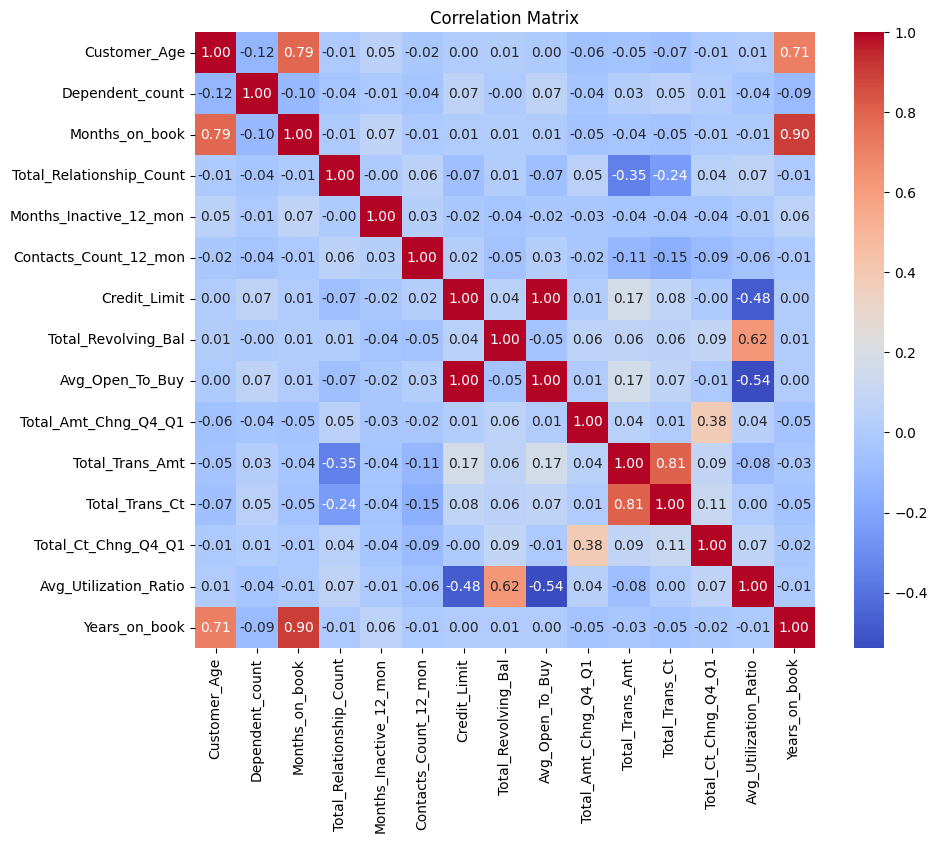

In [ ]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])


corr_matrix = numerical_data.corr()


plt.figure(figsize=(10, 8))


sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Correlation matrix heat maps visually represent the strength of relationships between different variables.

1. The correlation between the number of months on book and customer age is 0.79, indicating a strong relationship. Older customers tend to have a longer relationship with the bank, suggesting loyalty and a lower likelihood of churn.
  
2. There is a perfect correlation (1.00) between the number of contacts and inactive months. This suggests that the more inactive months a customer has, the more contacts they make with the bank. This could be due to inactivity alerts or retention efforts, which are important in predicting customer churn.
  
3. The correlation between total transaction amount and total number of transactions is 0.81. This indicates that customers who trade more frequently also tend to have higher total transaction amounts, signifying active account use and potentially reducing the risk of churn.
  
4. There is a negative correlation (-0.24) between customer age and total number of transactions, suggesting that younger customers tend to transact more frequently. This insight can inform targeted marketing strategies.

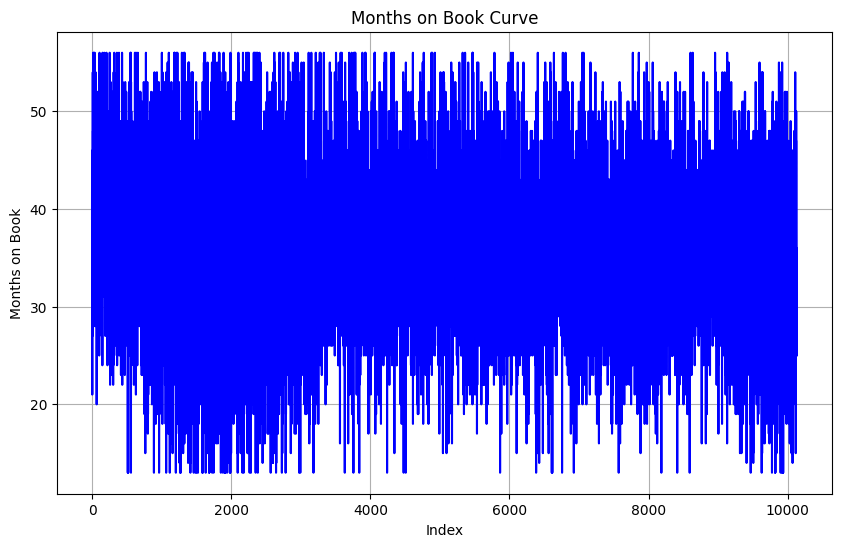

Kurtosis of Months_on_book Features: 0.399310189159515


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

# Extract data from the 'Months_on_book' column
months_on_book_data = df['Months_on_book']

# Plot the curve for the 'Months_on_book' column
plt.figure(figsize=(10, 6))
plt.plot(months_on_book_data, color='blue')
plt.title('Months on Book Curve')
plt.xlabel('Index')
plt.ylabel('Months on Book')
plt.grid(True)
plt.show()

# Calculate the kurtosis of the 'Months_on_book' column
kurtosis_value = kurtosis(months_on_book_data)
print("Kurtosis of Months_on_book Features:", kurtosis_value)


The value of "Kurtosis of Months on Book Features" is 0.399310189159515, indicating that the kurtosis of the "Months on book" feature in the dataset is approximately 0.4. This means that compared to a normal distribution, the distribution pattern of the "Months on book" feature is relatively flat. In other words, the distribution of data on the "Months on book" feature is not very sharp or steep compared to a normal distribution. This can lead us to a preliminary conclusion that the distribution of the number of months a customer holds a bank card in the dataset is relatively flat, with no obvious anomalies or concentration in a specific range.

# Data Preprocessing

Splitting the dataset into 80-20 for train and test sets before data pre-processing to prevent data leakage

Applying stratify parameter as there is a large imbalance in the distribution of the target classes

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(columns='Attrition_Flag')
y = df.Attrition_Flag
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

Removing the CLIENTNUM column, as there is no prove that the records are in sequence

In [ ]:
x_train.CLIENTNUM.sort_values()

9821    708082083
1589    708083283
4417    708084558
6148    708085458
6784    708086958
          ...    
4162    828288333
2996    828291858
7296    828294933
777     828298908
3943    828343083
Name: CLIENTNUM, Length: 8101, dtype: object

In [ ]:
x_train = x_train.drop(columns='CLIENTNUM')
x_test = x_test.drop(columns='CLIENTNUM')

Checking for null values in the training set

In [ ]:
x_train.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Years_on_book               0
dtype: int64

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8101 entries, 1602 to 3640
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8101 non-null   int64  
 1   Gender                    8101 non-null   object 
 2   Dependent_count           8101 non-null   int64  
 3   Education_Level           8101 non-null   object 
 4   Marital_Status            8101 non-null   object 
 5   Income_Category           8101 non-null   object 
 6   Card_Category             8101 non-null   object 
 7   Months_on_book            8101 non-null   int64  
 8   Total_Relationship_Count  8101 non-null   int64  
 9   Months_Inactive_12_mon    8101 non-null   int64  
 10  Contacts_Count_12_mon     8101 non-null   int64  
 11  Credit_Limit              8101 non-null   float64
 12  Total_Revolving_Bal       8101 non-null   int64  
 13  Avg_Open_To_Buy           8101 non-null   float64
 14  Total_Amt_

Encoding the target variable - Attrition_Flag

Replacing existing customer as '0' and attrited customer as '1'



In [ ]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

y_train.value_counts()

Attrition_Flag
Existing Customer    6799
Attrited Customer    1302
Name: count, dtype: int64

In [ ]:
y_train = y_train.replace({'Existing Customer':0, 'Attrited Customer':1})
y_test = y_test.replace({'Existing Customer':0, 'Attrited Customer':1})

y_train.value_counts()

Attrition_Flag
0    6799
1    1302
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

Attrition_Flag
0    1701
1     325
Name: count, dtype: int64

Since there are 2 types of categorical variables in this dataset, we will use different feature-encoding techniques to tackle the issue

One-hot encoding is used for categorical nominal variable like Gender and Marital_Status

It will create additional features, namely dummy variables based on the unique values in the categorical feature. This method is cause the issue of multicollinearity, so one of the dummy variables will be dropped. For example, we will only need 1 column for gender, if male gender is TRUE, then FALSE will represent female gender

In [ ]:
x_train.Gender.value_counts()

Gender
F    4262
M    3839
Name: count, dtype: int64

In [ ]:
x_train.Marital_Status.value_counts()

Marital_Status
Married     3755
Single      3156
Unknown      599
Divorced     591
Name: count, dtype: int64

In [ ]:
df1 = pd.get_dummies(x_train.loc[:, ['Gender','Marital_Status']], prefix=['Gender','Marital_Status'], drop_first=True)
x_train = pd.concat([x_train, df1], axis=1)
x_train = x_train.drop(columns={'Gender','Marital_Status'})

In [ ]:
df2 = pd.get_dummies(x_test.loc[:, ['Gender','Marital_Status']], prefix=['Gender','Marital_Status'], drop_first=True)
x_test = pd.concat([x_test, df2], axis=1)
x_test = x_test.drop(columns={'Gender','Marital_Status'})

Before one-hot encoding Gender and Marital_Status variables, we had 19 variables in our dataset. After creating dummy variables, we had 23 variables and we dropped one dummy variable from each to overcome the problem of multicollinearity.

In [ ]:
x_train.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Years_on_book,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
1602,54,3,College,Unknown,Blue,49,6,2,3,13184.0,...,1.166,2047,33,0.179,0.000,4,False,False,True,False
7791,51,0,High School,$80K - $120K,Blue,45,3,2,3,10648.0,...,0.708,4930,89,0.978,0.236,3,True,False,True,False
7177,45,4,High School,$40K - $60K,Blue,29,3,2,1,4595.0,...,0.708,3746,68,0.545,0.388,2,False,False,True,False
97,53,3,Doctorate,$40K - $60K,Blue,35,5,3,2,3789.0,...,1.047,1609,42,0.680,0.450,2,True,True,False,False
4820,48,2,Graduate,Unknown,Blue,40,3,2,4,5104.0,...,0.679,3943,78,0.696,0.144,3,False,True,False,False


Label encoding is used for categoral ordinal variable, such as Education_Level, Income_Category, and Card_Category

It will use integers to represent each value of the categorical variable, and may imply an unintended order to the variable, so it is suitable for ordinal variables.

In [ ]:
x_train.Education_Level.value_counts()

Education_Level
Graduate         2442
High School      1603
Unknown          1232
Uneducated       1219
College           829
Post-Graduate     404
Doctorate         372
Name: count, dtype: int64

In [ ]:
x_train.Income_Category.value_counts()

Income_Category
Less than $40K    2838
$40K - $60K       1442
$80K - $120K      1244
$60K - $80K       1104
Unknown            873
$120K +            600
Name: count, dtype: int64

In [ ]:
x_train.Card_Category.value_counts()

Card_Category
Blue        7541
Silver       455
Gold          91
Platinum      14
Name: count, dtype: int64

In [ ]:
x_train.Education_Level = x_train.Education_Level.replace({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6})
x_train.Income_Category = x_train.Income_Category.replace({'Unknown':0, 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5})
x_train.Card_Category = x_train.Card_Category.replace({'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3})
x_train = x_train.reset_index(drop=True)

In [ ]:
x_test.Education_Level = x_test.Education_Level.replace({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6})
x_test.Income_Category = x_test.Income_Category.replace({'Unknown':0, 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5})
x_test.Card_Category = x_test.Card_Category.replace({'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3})
x_test = x_test.reset_index(drop=True)

In [ ]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=42)
#x_train, y_train = sm.fit_resample(x_train, y_train)

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              2026 non-null   int64  
 1   Dependent_count           2026 non-null   int64  
 2   Education_Level           2026 non-null   int64  
 3   Income_Category           2026 non-null   int64  
 4   Card_Category             2026 non-null   int64  
 5   Months_on_book            2026 non-null   int64  
 6   Total_Relationship_Count  2026 non-null   int64  
 7   Months_Inactive_12_mon    2026 non-null   int64  
 8   Contacts_Count_12_mon     2026 non-null   int64  
 9   Credit_Limit              2026 non-null   float64
 10  Total_Revolving_Bal       2026 non-null   int64  
 11  Avg_Open_To_Buy           2026 non-null   float64
 12  Total_Amt_Chng_Q4_Q1      2026 non-null   float64
 13  Total_Trans_Amt           2026 non-null   int64  
 14  Total_Tr

Grouping all the numerical features together, and creating a StandardScaler instance to fit it on the training data

In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]
scaler = StandardScaler()

scaler.fit(x_train[numerical_features])

StandardScaler()

Transforming (standardize) the continuous features in the training and testing data

In [ ]:
x_train_cont_scaled = scaler.transform(x_train[numerical_features])

x_test_cont_scaled = scaler.transform(x_test[numerical_features])


Replacing the scaled continuous features in the original data

In [ ]:

x_train[numerical_features] = x_train_cont_scaled

x_test[numerical_features] = x_test_cont_scaled

x_train

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Years_on_book,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0.960879,0.500810,3,0,0,1.641549,1.408689,-0.334749,0.498306,0.499350,...,1.849946,-0.690664,-1.352045,-2.236148,-0.997981,4,False,False,True,False
1,0.585187,-1.812662,2,4,0,1.138843,-0.530662,-0.334749,0.498306,0.220896,...,-0.236908,0.158083,1.032495,1.116504,-0.138838,3,True,False,True,False
2,-0.166196,1.271967,2,2,0,-0.871977,-0.530662,-0.334749,-1.313533,-0.443727,...,-0.236908,-0.190483,0.138293,-0.700390,0.414508,2,False,False,True,False
3,0.835648,0.500810,6,2,0,-0.117919,0.762239,0.662971,-0.407614,-0.532227,...,1.307729,-0.819610,-0.968815,-0.133922,0.640214,2,True,True,False,False
4,0.209496,-0.270348,4,0,0,0.510462,-0.530662,-0.334749,1.404226,-0.387839,...,-0.369046,-0.132487,0.564103,-0.066785,-0.473758,3,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,1.336570,0.500810,2,1,0,0.384786,1.408689,1.660690,-0.407614,-0.642906,...,-0.268804,0.054161,0.691846,0.910897,0.301654,3,False,False,False,True
8097,0.209496,-0.270348,2,0,0,-1.123330,-0.530662,-1.332469,-0.407614,-0.508071,...,0.574140,0.033259,0.649265,0.621369,0.236126,2,False,True,False,False
8098,0.459957,-1.041505,1,1,0,0.007757,1.408689,-0.334749,-0.407614,-0.486659,...,-0.569529,0.102148,0.095711,-0.792704,-0.564769,3,False,True,False,False
8099,-0.416657,2.043124,0,3,0,0.007757,-0.530662,2.658410,-1.313533,-0.134529,...,0.177729,-0.033864,0.649265,-0.331137,-0.339062,3,True,True,False,False


# Model Training and Evaluation

Selecting a few classifiers to evaluate, such as DecisionTree, and RandomForest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

classifiers = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42, n_jobs =-1)),
    ("LightGBM", lgb.LGBMClassifier(random_state=42, verbose=-1)),
]

Applying K-fold cross-validation through pipelines to thoroughly test the machine learning models. In addition, integrating feature selection to make sure the best features are choosen. It guarantees that the model will work well across different scenarios.

In [ ]:
from sklearn.feature_selection import RFE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
import numpy as np

RFE_selector = RFE(lgb.LGBMClassifier(random_state=42, verbose=-1), n_features_to_select=12)
results = []
mean_test_accuracy_scores = []
classifier_names = []

for model_name, model in classifiers:

    # Steps Creation
    steps = list()

    steps.append(('feature_selector', RFE_selector))  # RFE feature selection

    steps.append((model_name, model))

    # Create the pipeline
    pipeline = Pipeline(steps=steps)

    # 5-fold Stratified Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation with train scores
    cv_results = cross_validate(pipeline, x_train, y_train, cv=cv, scoring='accuracy',n_jobs=-1, return_train_score=True)

    print(f"Cross-validation completed for {model_name}")

    # Append results to the list
    results.append({
        "Model Name": model_name,
        "Mean Train Accuracy": np.mean(cv_results['train_score']),
        "Mean Test Accuracy": np.mean(cv_results['test_score'])
    })

    mean_test_accuracy_scores.append(np.mean(cv_results['test_score']))
    classifier_names.append(model_name)



Cross-validation completed for Decision Tree
Cross-validation completed for Random Forest
Cross-validation completed for LightGBM


Displaying out the results in a dataframe

In [ ]:
results_df = pd.DataFrame(results)

display(results_df)

,Model Name,Mean Train Accuracy,Mean Test Accuracy
0,Decision Tree,1.000000,0.935687
1,Random Forest,1.000000,0.964325
2,LightGBM,0.999907,0.970127


Show the selected features used in the model

In [ ]:
RFE_selector = RFE(lgb.LGBMClassifier(random_state=42, verbose=-1), n_features_to_select=12)

# Fit RFE selector to the training data
RFE_selector.fit(x_train, y_train)

# Get the indices of the selected features
selected_feature_indices = np.where(RFE_selector.support_)[0]

# Get the names of the selected features based on their indices
selected_feature_names = x_train.columns[selected_feature_indices]

# Print the names of the selected features
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['Customer_Age', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'],
      dtype='object')


Select the Light Gradient-Boosting Machine Model to train as it has the highest accuracy when compared among the tree models

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score

# Define the pipeline with the feature selector
pipeline = Pipeline(steps=[
    ('feature_selector', RFE_selector),
    ("Light GBM", lgb.LGBMClassifier(random_state=42, n_jobs =-1))
])

pipeline.fit(x_train, y_train)

# Predictions on test data
y_pred = pipeline.predict(x_test)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')


[LightGBM] [Info] Number of positive: 1302, number of negative: 6799
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1763
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160721 -> initscore=-1.652874
[LightGBM] [Info] Start training from score -1.652874


Showing the accuracy and F1-score of the model

In [ ]:
print(f'Training Accuracy: {accuracy_score(y_train, pipeline.predict(x_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1-score: {f1}')

Training Accuracy: 0.9995062337982965
Testing Accuracy: 0.972852912142152
F1-score: 0.9728019336046037


Showing the Confusion Matrix

In [ ]:
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

Testing Confusion Matrix: 
[[1675   26]
 [  29  296]]


Showing the Classification Report

In [ ]:
print(f'Testing Classification report: \n{classification_report(y_test, y_pred)}')

Testing Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1701
           1       0.92      0.91      0.91       325

    accuracy                           0.97      2026
   macro avg       0.95      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026



The model shows a F1-score of 97%, and it has no signs of overfitting